In [1]:
'''
Добрый день, дорогой участник курса!
Должно быть, ты читаешь эти строки, чтобы твою работу поскорей проверили.
Запускай окошки последовательно в директории с данными - и будет тебе счастье.
Функции, инкапсулирующие в себе обучение, кросс-валидацию и подсчёт метрики
'''
def getBoostMetrics(X,y,n):
    auc_roc=0;
    kf=KFold(n_splits=5,shuffle=True,random_state=42)
    clf=GradientBoostingClassifier(n_estimators=n, random_state=42)
    for train,test in kf.split(X,y):
        clf.fit(X.iloc[train],y.iloc[train])
        pred=clf.predict_proba(X.iloc[test])[:,1]
        auc_roc+=roc_auc_score(y.iloc[test],pred)
    return auc_roc/5;
#То же самое, но логистическая регрессия
def getLogMetrics(X,y,n):
    auc_roc=0;
    kf=KFold(n_splits=5,shuffle=True,random_state=42)
    clf=LogisticRegression(C=n,penalty='l2')
    for train,test in kf.split(X,y):
        clf.fit(X.iloc[train],y.iloc[train])
        pred=clf.predict_proba(X.iloc[test])[:,1]
        auc_roc+=roc_auc_score(y.iloc[test],pred)
    return auc_roc/5;
#импортируем всё, что нужно для счастья
import time
import datetime
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pandas

#извлекаем признаки
features = pandas.read_csv('./features.csv', index_col='match_id')
#сохраним целевую переменную - победила или нет команда radiant
y=features.radiant_win

#Удалим всё, что не относится к первым пяти минутам
features=features.drop(['duration','radiant_win','tower_status_radiant',
               'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)

#features=features.drop(['duration','tower_status_radiant',
#                        'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)


#Проверяем наличие NaN значений. Если они есть, выведем информацию об этом
# list(df.columns.values) - список имён колонок 
for column_name in list(features.columns.values):
    if(features[column_name].count()!=features.shape[0]):
        print(column_name,' omits ',features.shape[0]-features[column_name].count(),' values;')


first_blood_time  omits  19553  values;
first_blood_team  omits  19553  values;
first_blood_player1  omits  19553  values;
first_blood_player2  omits  43987  values;
radiant_bottle_time  omits  15691  values;
radiant_courier_time  omits  692  values;
radiant_flying_courier_time  omits  27479  values;
radiant_first_ward_time  omits  1836  values;
dire_bottle_time  omits  16143  values;
dire_courier_time  omits  676  values;
dire_flying_courier_time  omits  26098  values;
dire_first_ward_time  omits  1826  values;


In [3]:
'''
Вывод после запуска окошка выше
first_blood_time  omits  19553  values;
first_blood_team  omits  19553  values;
first_blood_player1  omits  19553  values;
first_blood_player2  omits  43987  values;
radiant_bottle_time  omits  15691  values;
radiant_courier_time  omits  692  values;
radiant_flying_courier_time  omits  27479  values;
radiant_first_ward_time  omits  1836  values;
dire_bottle_time  omits  16143  values;
dire_courier_time  omits  676  values;
dire_flying_courier_time  omits  26098  values;
dire_first_ward_time  omits  1826  values;

Ого, NaN значений действительно много! Для first_blood_player1 и first_blood_player2 можно сказать,
что событие не всегда успевает случиться за первую пятиминутку.

'''



#С NaN разобрались, заполним значение нулями. Кстати, заполнение большой величиной позволило повысить качество
#примерно на 0.2%. Пустячок, а приятно
features.fillna(0,inplace=True)

#Почти всё готово для предсказания, прогоним GradientBoostingClassifier со значениями 5, 10, 20, 30, 40


results=[]
times=[]
n_list=[5,10,20,30,40]
for n in n_list:
    start_time = datetime.datetime.now()
    results.append(getBoostMetrics(features,y,n))
    times.append(datetime.datetime.now() - start_time)
    print('tree count: ',n,' roc_auc: ',results[-1],'time:',times[-1])
    

tree count:  5  roc_auc:  0.635357433114 time: 0:00:55.910201
tree count:  10  roc_auc:  0.664850687975 time: 0:01:37.490449
tree count:  20  roc_auc:  0.682461876804 time: 0:04:35.353682
tree count:  30  roc_auc:  0.690006471039 time: 0:04:54.309742
tree count:  40  roc_auc:  0.694038724512 time: 0:04:57.449679


'\nВидно, что увеличение количества деревьев приносит результат, но чем дальше, тем меньше.\nБудет полезнее улучшать данные.\nКраткий отчёт в одном месте:\n1. \nfirst_blood_time  omits  19553  values;\nfirst_blood_team  omits  19553  values;\nfirst_blood_player1  omits  19553  values;\nfirst_blood_player2  omits  43987  values;\nradiant_bottle_time  omits  15691  values;\nradiant_courier_time  omits  692  values;\nradiant_flying_courier_time  omits  27479  values;\nradiant_first_ward_time  omits  1836  values;\ndire_bottle_time  omits  16143  values;\ndire_courier_time  omits  676  values;\ndire_flying_courier_time  omits  26098  values;\ndire_first_ward_time  omits  1826  values;\nДля first_blood_player1 и first_blood_player2 можно сказать,\nчто данные достаточно редкие, видимо, не всегда случаются на первых пяти минутах\n2. \nradiant_win\n3. \n74.91 секунды\n4. \nКачество растёт, но чем больше деревьев, тем медленнее.\nНужно улучшать предварительную обработку данных. Для ускорения об

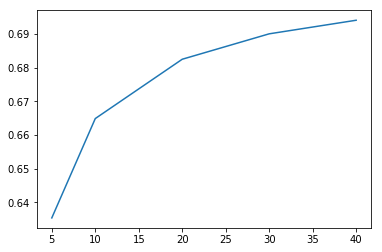

In [4]:
'''
У меня получились следующие результаты:

tree count:  5  roc_auc:  0.635357433114 time: 0:00:15.376037
tree count:  10  roc_auc:  0.664850687975 time: 0:00:26.363707
tree count:  20  roc_auc:  0.682461876804 time: 0:00:52.652367
tree count:  30  roc_auc:  0.690006471039 time: 0:01:14.910629
tree count:  40  roc_auc:  0.694038724512 time: 0:01:34.234331
'''

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(n_list,results)
'''
Видно, что увеличение количества деревьев приносит результат, но чем дальше, тем меньше.
Будет полезнее улучшать данные.
Краткий отчёт в одном месте:
1. 
first_blood_time  omits  19553  values;
first_blood_team  omits  19553  values;
first_blood_player1  omits  19553  values;
first_blood_player2  omits  43987  values;
radiant_bottle_time  omits  15691  values;
radiant_courier_time  omits  692  values;
radiant_flying_courier_time  omits  27479  values;
radiant_first_ward_time  omits  1836  values;
dire_bottle_time  omits  16143  values;
dire_courier_time  omits  676  values;
dire_flying_courier_time  omits  26098  values;
dire_first_ward_time  omits  1826  values;
Для first_blood_player1 и first_blood_player2 можно сказать,
что данные достаточно редкие, видимо, не всегда случаются на первых пяти минутах
2. 
radiant_win
3. 
74.91 секунды, 69%
4. 
Качество растёт, но чем больше деревьев, тем медленнее.
Нужно улучшать предварительную обработку данных. Для ускорения обучения можно использовать
не всю выборку, а лишь некоторое случайное подмножество или уменьшить глубину деревьев

'''

In [5]:
'''
Время логистической регрессии! Данные у нас уже получены и обработаны, можно сразу учить
'''
#Для логистической регрессии важно масштабировать признаки
scaler=StandardScaler()
features=pandas.DataFrame(scaler.fit_transform(features))
results=[]
times=[]
c_list=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
for c in c_list:
    start_time = datetime.datetime.now()
    results.append(getLogMetrics(features, y, c))
    times.append(datetime.datetime.now() - start_time)
    print('С: ',c,' roc_auc: ',results[-1],'time:',times[-1])

С:  1e-05  roc_auc:  0.695161685464 time: 0:00:09.438223
С:  0.0001  roc_auc:  0.711357747143 time: 0:00:15.071492
С:  0.001  roc_auc:  0.716363537821 time: 0:00:24.872540
С:  0.01  roc_auc:  0.716550269726 time: 0:00:31.852915
С:  0.1  roc_auc:  0.716527148666 time: 0:00:35.799101
С:  1  roc_auc:  0.716522600363 time: 0:00:38.024424
С:  10  roc_auc:  0.716522288896 time: 0:00:36.857185
С:  100  roc_auc:  0.716522295258 time: 0:00:37.268179
С:  1000  roc_auc:  0.716522322796 time: 0:00:36.791576
С:  10000  roc_auc:  0.716522327033 time: 0:00:33.020474
С:  100000  roc_auc:  0.716522331269 time: 0:00:34.386450


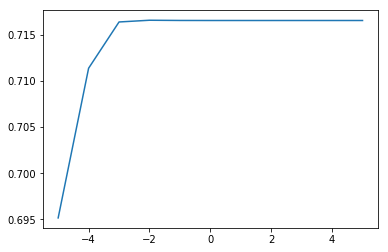

In [6]:
'''
Как видим, значения примерно равны градинетному бустингу:
С:  1e-05  roc_auc:  0.695161685464 time: 0:00:04.528259
С:  0.0001  roc_auc:  0.711357747143 time: 0:00:06.992400
С:  0.001  roc_auc:  0.716363537821 time: 0:00:13.015744
С:  0.01  roc_auc:  0.716550269726 time: 0:00:16.408939
С:  0.1  roc_auc:  0.716527148666 time: 0:00:18.282045
С:  1  roc_auc:  0.716522600363 time: 0:00:19.038089
С:  10  roc_auc:  0.716522288896 time: 0:00:18.819077
С:  100  roc_auc:  0.716522295258 time: 0:00:18.376051
С:  1000  roc_auc:  0.716522322796 time: 0:00:18.390052
С:  10000  roc_auc:  0.716522327033 time: 0:00:18.682068
С:  100000  roc_auc:  0.716522331269 time: 0:00:19.271102
'''
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(np.log10(c_list),results)


In [7]:
'''
Удалим 11 категориальных признаков, обучим вновь
'''


features = pandas.read_csv('./features.csv', index_col='match_id')
y=features.radiant_win
features=features.drop(['duration','radiant_win','tower_status_radiant',
               'tower_status_dire','barracks_status_radiant','barracks_status_dire',
                       'lobby_type','r1_hero','r2_hero','r3_hero','r4_hero',
                        'r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero'],axis=1)
features.fillna(0,inplace=True)
features=pandas.DataFrame(scaler.fit_transform(features))
results=[]
times=[]
c_list=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
for c in c_list:
    start_time = datetime.datetime.now()
    results.append(getLogMetrics(features,y,c))
    times.append(datetime.datetime.now() - start_time)
    print('С: ',c,' roc_auc: ',results[-1],'time:',times[-1])

С:  1e-05  roc_auc:  0.695100191344 time: 0:00:09.223193
С:  0.0001  roc_auc:  0.711339145863 time: 0:00:13.765448
С:  0.001  roc_auc:  0.716375799908 time: 0:00:26.345183
С:  0.01  roc_auc:  0.716559388563 time: 0:00:31.599393
С:  0.1  roc_auc:  0.716534240347 time: 0:00:36.399795
С:  1  roc_auc:  0.716530363451 time: 0:00:35.401137
С:  10  roc_auc:  0.716529971503 time: 0:00:35.626276
С:  100  roc_auc:  0.716529891006 time: 0:00:34.913639
С:  1000  roc_auc:  0.716529888885 time: 0:00:33.186303
С:  10000  roc_auc:  0.71652988465 time: 0:00:31.346220
С:  100000  roc_auc:  0.71652988465 time: 0:00:33.306603


r1_hero 108
d1_hero 108
r2_hero 108
d2_hero 108
r3_hero 108
d3_hero 108
r4_hero 108
d4_hero 108
r5_hero 108
d5_hero 108


'\nСтранные вещи! В каждой колонке по 108 уникальных значений, а в dictionaries есть записи о 113 персонажах. Это довольно странно\n'

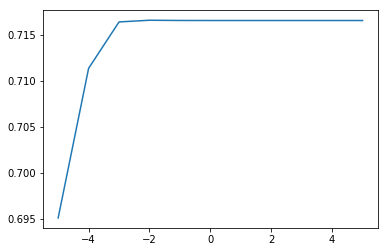

In [8]:
'''
Хмм, результаты очень похожи, модель не использовала удалённые признаки:
С:  1e-05  roc_auc:  0.695100191344 time: 0:00:04.043231
С:  0.0001  roc_auc:  0.711339145863 time: 0:00:06.487371
С:  0.001  roc_auc:  0.716375799908 time: 0:00:12.491714
С:  0.01  roc_auc:  0.716559388563 time: 0:00:15.713899
С:  0.1  roc_auc:  0.716534240347 time: 0:00:18.200041
С:  1  roc_auc:  0.716530363451 time: 0:00:18.408053
С:  10  roc_auc:  0.716529971503 time: 0:00:18.147038
С:  100  roc_auc:  0.716529891006 time: 0:00:18.212042
С:  1000  roc_auc:  0.716529888885 time: 0:00:17.972028
С:  10000  roc_auc:  0.71652988465 time: 0:00:17.973028
С:  100000  roc_auc:  0.71652988465 time: 0:00:18.189040
'''
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(np.log10(c_list),results)

'''
На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero,
которые показывают, какие именно герои играли за каждую команду.
Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще,
чем другие. Выясните из данных, сколько различных идентификаторов героев существует
в данной игре (вам может пригодиться фукнция unique или value_counts).
Что ж, мы снесли эти признаки - восстановим их
'''

features = pandas.read_csv('./features.csv', index_col='match_id')
y=features.radiant_win

features=features.drop(['duration','radiant_win','tower_status_radiant',
               'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)
features.fillna(0,inplace=True)

#Выводим количество уникальных значений
for M in ['1','2','3','4','5']:
    for team in ['r','d']:
        col_name=team+M+'_hero'
        print(col_name,len(features[col_name].unique()))
'''
Странные вещи! В каждой колонке по 108 уникальных значений, а в dictionaries есть записи о 113 персонажах. Это довольно странно
'''

In [9]:
scaler=StandardScaler()
features = pandas.read_csv('./features.csv', index_col='match_id')
y=features.radiant_win
features=features.drop(['duration','radiant_win','tower_status_radiant',
               'tower_status_dire','barracks_status_radiant','barracks_status_dire',
                       'lobby_type'],axis=1)
features.fillna(0,inplace=True)


#Воспользуемся копипастой
X_pick = np.zeros((features.shape[0], 113))
for i, match_id in enumerate(features.index):
    for p in range(5):
        X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]] = 1
        X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]] = -1
X_pick[:,0]=features.index
X_df=pandas.DataFrame(X_pick)
X_df.set_index(0)
X_df=X_df.rename(columns={0:'index'})
X_df=X_df.set_index('index')
features=features.join(X_df,how='right')
features=pandas.DataFrame(scaler.fit_transform(features))

results=[]
times=[]
c_list=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
for c in c_list:
    start_time = datetime.datetime.now()
    results.append(getLogMetrics(features,y,c))
    times.append(datetime.datetime.now() - start_time)
    print('C: ',c,' roc_auc: ',results[-1],'time:',times[-1])

C:  1e-05  roc_auc:  0.714803147624 time: 0:00:17.211324
C:  0.0001  roc_auc:  0.742710055995 time: 0:00:26.593457
C:  0.001  roc_auc:  0.751577289037 time: 0:00:46.561899
C:  0.01  roc_auc:  0.751927374263 time: 0:01:07.662141
C:  0.1  roc_auc:  0.751897356795 time: 0:01:14.058539
C:  1  roc_auc:  0.751890984465 time: 0:01:11.014475
C:  10  roc_auc:  0.75189036587 time: 0:01:16.539254
C:  100  roc_auc:  0.751890274777 time: 0:01:17.251100
C:  1000  roc_auc:  0.751890240887 time: 0:01:24.170818
C:  10000  roc_auc:  0.751890240887 time: 0:01:17.601000
C:  100000  roc_auc:  0.751890240888 time: 0:01:14.923902


In [ ]:
'''
Ого, +4%
C:  1e-05  roc_auc:  0.714803147624 time: 0:00:08.855506
C:  0.0001  roc_auc:  0.742710055995 time: 0:00:13.979800
C:  0.001  roc_auc:  0.751577289037 time: 0:00:24.889423
C:  0.01  roc_auc:  0.751927374263 time: 0:00:37.590150
C:  0.1  roc_auc:  0.751897356795 time: 0:00:39.948284
C:  1  roc_auc:  0.751890984465 time: 0:00:40.178299
C:  10  roc_auc:  0.75189036587 time: 0:00:40.023289
C:  100  roc_auc:  0.751890274777 time: 0:00:40.032289
C:  1000  roc_auc:  0.751890240887 time: 0:00:39.521261
C:  10000  roc_auc:  0.751890240887 time: 0:00:39.891282
C:  100000  roc_auc:  0.751890240888 time: 0:00:39.907282
Из-за добавления новых признаков качество сильно улучшилось, ура!
'''

In [ ]:
'''
Пункты отчёта коротко:
1. 71.6%, регрессия лучше и быстрее. На большом количестве данных и с 
хорошим масштабированием регрессия работает лучше
2. Практически никак, регрессия хорошо справляется с мусорными данными
3. 113 персонажей
4. 75.2%. Сильно улучшилось, благодаря "мешку слов" регрессии удалось хорошо
связать героя с его метрикой
5. При отправке на kaggle качество и регрессии, и бустинга соответствовало
приведённым данным, регрессия с C=0.01 лучше всех
'''